# Road Traffic Accident Severity Classification


In [ ]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning preprocessing tools
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Classical machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Neural network from sklearn
from sklearn.neural_network import MLPClassifier

# Feature selection methods
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# Set visualization style for better looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("All necessary libraries imported successfully!")

All necessary libraries imported successfully!


In [ ]:
import pandas as pd

df = pd.read_csv('Road Traffic Accidents Classification Dataset.csv')

print("Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape[0]} rows and {df.shape[1]} columns")
print("\nFirst few rows of the dataset:")
df.head()

Dataset loaded successfully!

Dataset Shape: 12316 rows and 32 columns

First few rows of the dataset:


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


### Dataset Description:
**Source:** Kaggle - Road Traffic Accidents Dataset  
**Link:** https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents

**UN SDG Alignment:**
- **SDG 3:** Good Health and Well-being - Reduces road injuries and fatalities
- **SDG 11:** Sustainable Cities and Communities - Supports safer transportation systems



In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

print("Statistical Summary of Numerical Features:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allig

In [ ]:
# Check the target variable distribution
print("Target Variable: Accident_severity")
print("\nValue Counts:")
print(df['Accident_severity'].value_counts())

print("\nPercentage Distribution:")
print(df['Accident_severity'].value_counts(normalize=True) * 100)

Target Variable: Accident_severity

Value Counts:
Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

Percentage Distribution:
Accident_severity
Slight Injury     84.564794
Serious Injury    14.152322
Fatal injury       1.282884
Name: proportion, dtype: float64


Missing Values Analysis:
                         Missing Values  Percentage
Defect_of_vehicle                  4427   35.945112
Service_year_of_vehicle            3928   31.893472
Work_of_casuality                  3198   25.966223
Fitness_of_casuality               2635   21.394933
Type_of_vehicle                     950    7.713543
Types_of_Junction                   887    7.202014
Driving_experience                  829    6.731082
Educational_level                   741    6.016564
Vehicle_driver_relation             579    4.701202
Owner_of_vehicle                    482    3.913608
Lanes_or_Medians                    385    3.126015
Vehicle_movement                    308    2.500812
Area_accident_occured               239    1.940565
Road_surface_type                   172    1.396557
Type_of_collision                   155    1.258525
Road_allignment                     142    1.152972


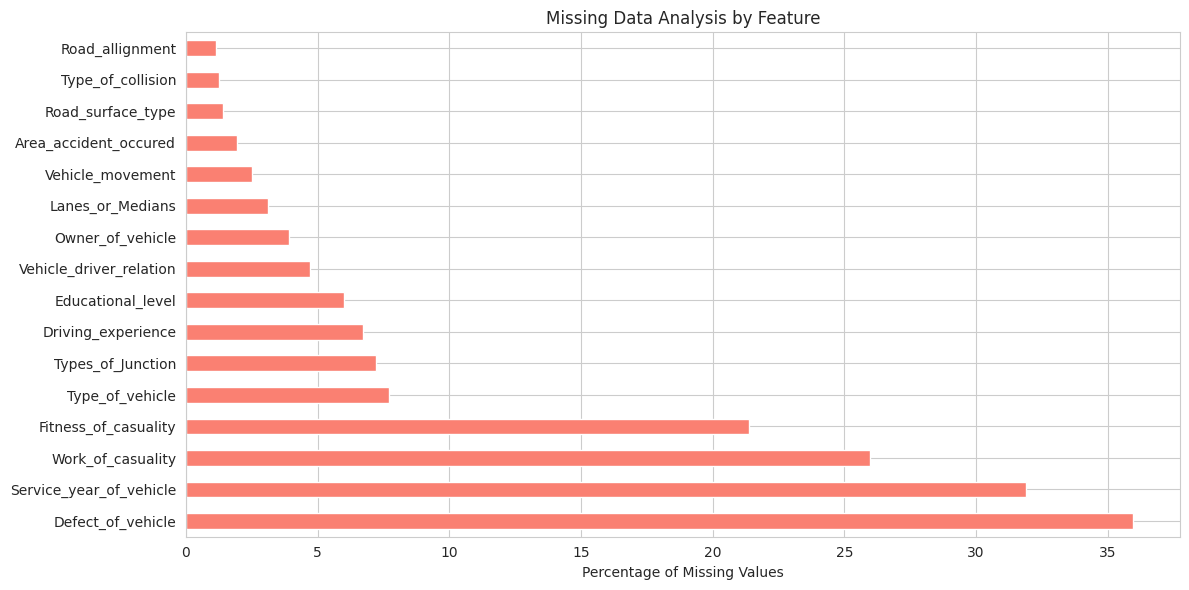

In [ ]:
# Check for missing values in each column
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percent
})

# Show only columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

print("Missing Values Analysis:")
print(missing_df)

# Visualize missing data
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    missing_df['Percentage'].plot(kind='barh', color='salmon')
    plt.xlabel('Percentage of Missing Values')
    plt.title('Missing Data Analysis by Feature')
    plt.tight_layout()
    plt.show()
else:
    print("\nGreat! No missing values found in the dataset.")

# Target Variable Analysis

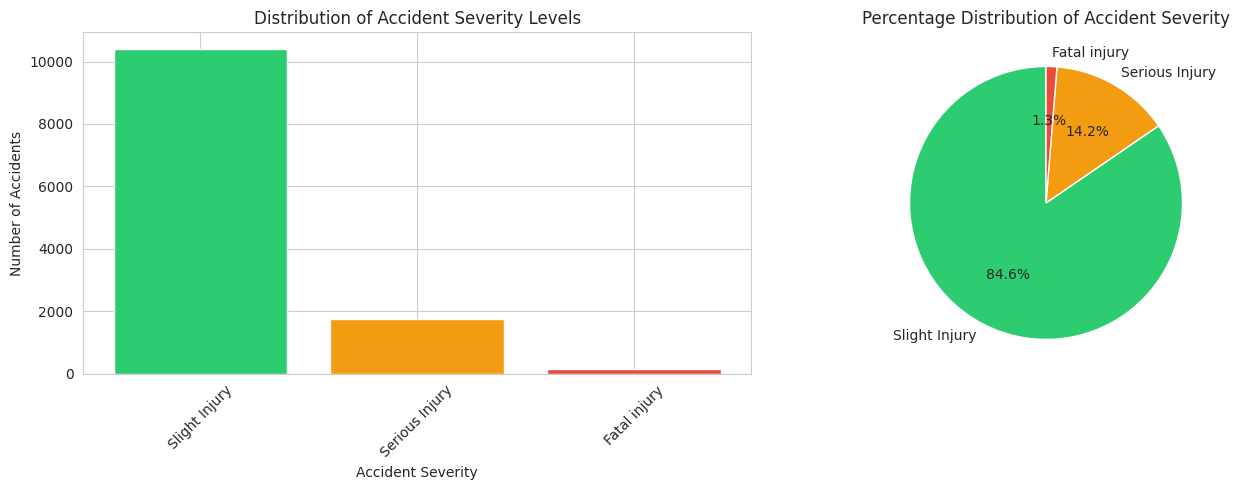


Key Insight: The dataset shows class imbalance with varying proportions of accident severities.
This will be important to consider during model training and evaluation.


In [ ]:
# Visualize the distribution of accident severity
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
severity_counts = df['Accident_severity'].value_counts()
axes[0].bar(severity_counts.index, severity_counts.values, color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[0].set_xlabel('Accident Severity')
axes[0].set_ylabel('Number of Accidents')
axes[0].set_title('Distribution of Accident Severity Levels')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
colors = ['#2ecc71', '#f39c12', '#e74c3c']
axes[1].pie(severity_counts.values, labels=severity_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[1].set_title('Percentage Distribution of Accident Severity')

plt.tight_layout()
plt.show()

print("\nKey Insight: The dataset shows class imbalance with varying proportions of accident severities.")
print("This will be important to consider during model training and evaluation.")

###  Analysis of Key Categorical Features

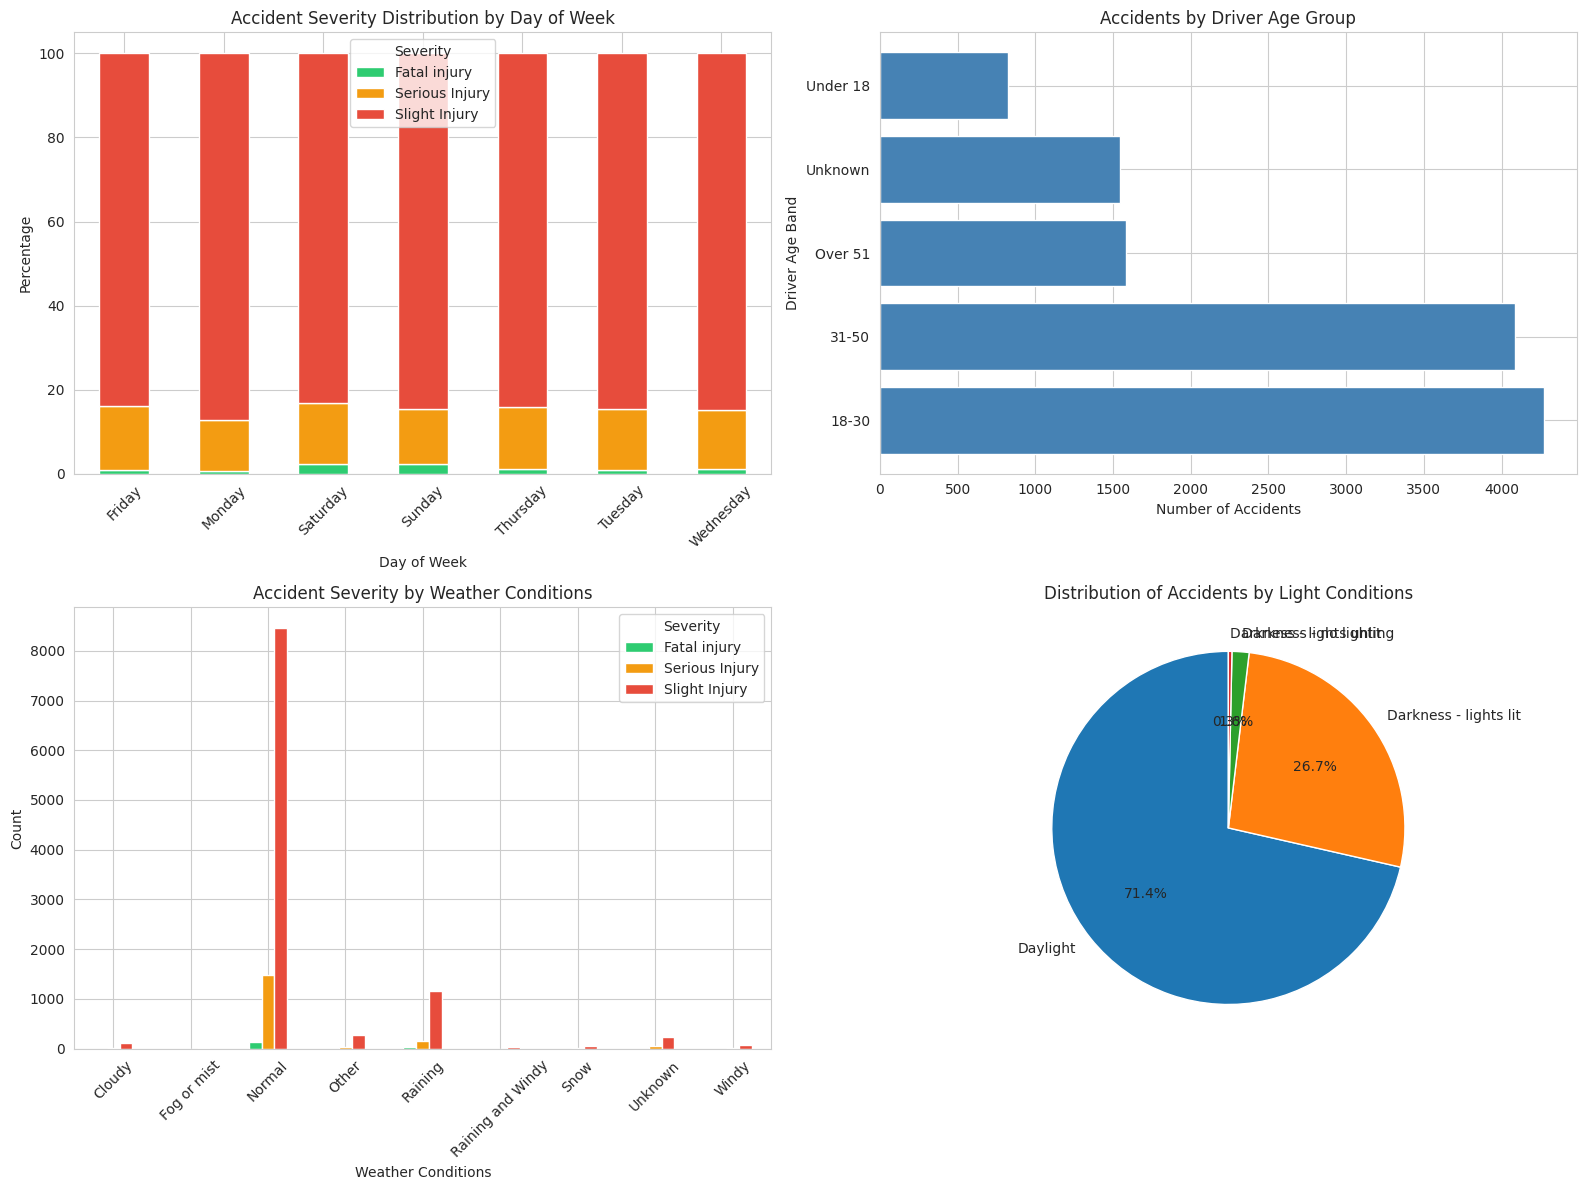


Key Insights from Categorical Analysis:
- Most accidents occur during specific days and times
- Young drivers (18-30) are involved in more accidents
- Weather and light conditions play significant roles in accident severity


In [ ]:
# Analyze accidents by day of week
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accidents by Day of Week
day_severity = pd.crosstab(df['Day_of_week'], df['Accident_severity'], normalize='index') * 100
day_severity.plot(kind='bar', ax=axes[0, 0], stacked=True, color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[0, 0].set_title('Accident Severity Distribution by Day of Week')
axes[0, 0].set_ylabel('Percentage')
axes[0, 0].set_xlabel('Day of Week')
axes[0, 0].legend(title='Severity')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Accidents by Age Band
age_counts = df['Age_band_of_driver'].value_counts().head(8)
axes[0, 1].barh(age_counts.index, age_counts.values, color='steelblue')
axes[0, 1].set_xlabel('Number of Accidents')
axes[0, 1].set_ylabel('Driver Age Band')
axes[0, 1].set_title('Accidents by Driver Age Group')

# 3. Accidents by Weather Conditions
weather_severity = pd.crosstab(df['Weather_conditions'], df['Accident_severity'])
weather_severity.plot(kind='bar', ax=axes[1, 0], color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[1, 0].set_title('Accident Severity by Weather Conditions')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xlabel('Weather Conditions')
axes[1, 0].legend(title='Severity')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Accidents by Light Conditions
light_counts = df['Light_conditions'].value_counts()
axes[1, 1].pie(light_counts.values, labels=light_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Distribution of Accidents by Light Conditions')

plt.tight_layout()
plt.show()

print("\nKey Insights from Categorical Analysis:")
print("- Most accidents occur during specific days and times")
print("- Young drivers (18-30) are involved in more accidents")
print("- Weather and light conditions play significant roles in accident severity")

### Feature Correlation Analysis

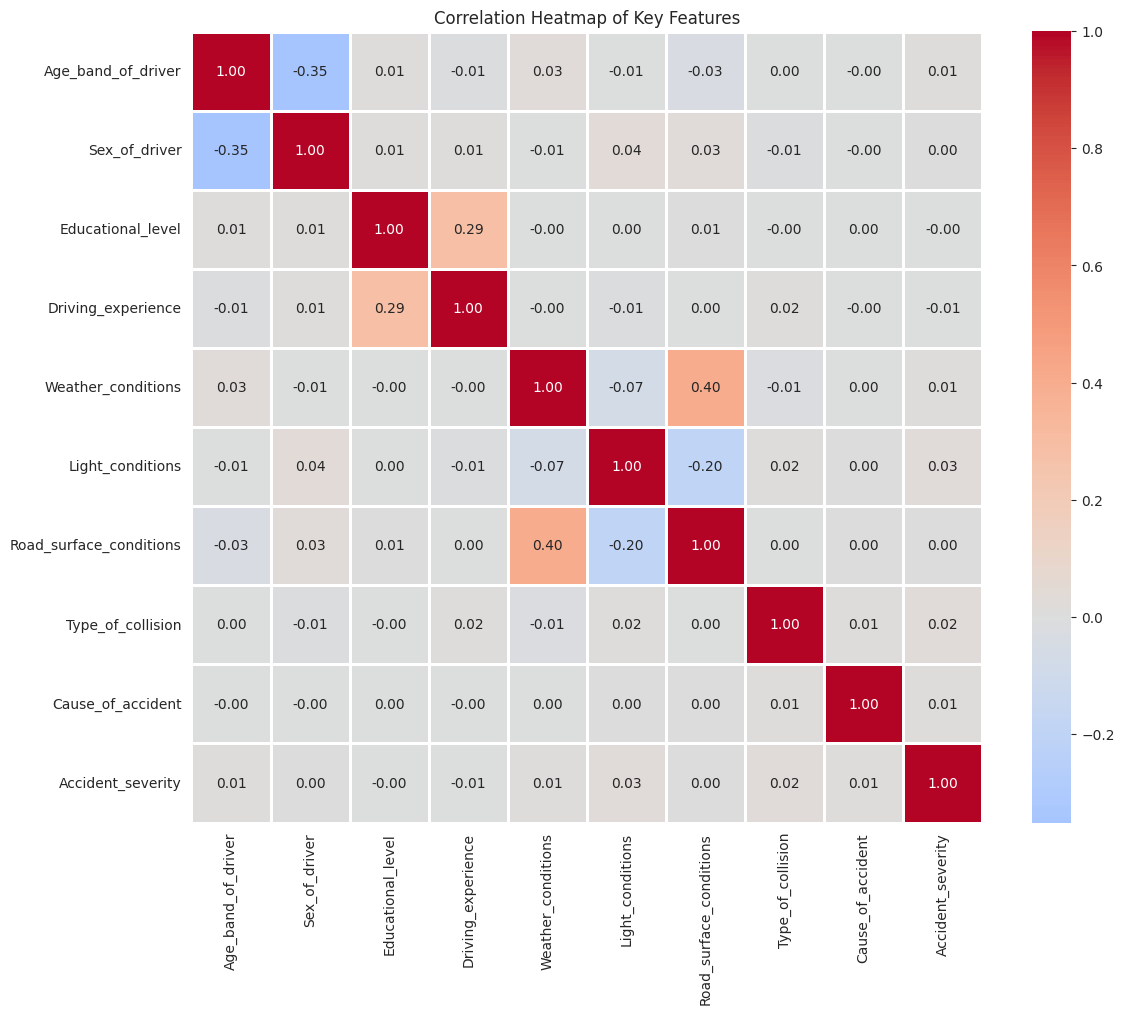


Insight: The heatmap shows relationships between different features.
Features with higher correlation to Accident_severity are more important for prediction.


In [ ]:
# Since most features are categorical, let's encode them for correlation analysis
# Create a copy for encoding
df_encoded = df.copy()

# Label encode categorical columns for correlation
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Select top features for correlation heatmap
important_features = ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
                     'Driving_experience', 'Weather_conditions', 'Light_conditions',
                     'Road_surface_conditions', 'Type_of_collision', 'Cause_of_accident',
                     'Accident_severity']

# Calculate correlation matrix
correlation_matrix = df_encoded[important_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap of Key Features')
plt.tight_layout()
plt.show()

print("\nInsight: The heatmap shows relationships between different features.")
print("Features with higher correlation to Accident_severity are more important for prediction.")

## - Data Preprocessing
### Handle Missing Values and Clean Data

In [ ]:
# Create a clean copy of the dataframe
df_clean = df.copy()

# Fill missing values with mode for categorical columns
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype == 'object':
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
        else:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Remove or replace inconsistent values
# For example, replace empty strings with 'Unknown'
df_clean = df_clean.replace('', 'Unknown')
df_clean = df_clean.replace(' ', 'Unknown')

print("Data cleaning completed!")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")
print(f"\nCleaned dataset shape: {df_clean.shape}")

Data cleaning completed!
Remaining missing values: 0

Cleaned dataset shape: (12316, 32)


### Feature Engineering and Encoding

In [ ]:
# Select relevant features for modeling
# We'll exclude the target variable and some redundant columns
features_to_use = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
                   'Educational_level', 'Driving_experience', 'Type_of_vehicle',
                   'Area_accident_occured', 'Road_surface_type', 'Road_surface_conditions',
                   'Light_conditions', 'Weather_conditions', 'Type_of_collision',
                   'Number_of_vehicles_involved', 'Number_of_casualties',
                   'Vehicle_movement', 'Cause_of_accident']

# Create feature matrix X and target vector y
X = df_clean[features_to_use].copy()
y = df_clean['Accident_severity'].copy()

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nTarget classes: {y.unique()}")

Feature matrix shape: (12316, 16)
Target vector shape: (12316,)

Target classes: ['Slight Injury' 'Serious Injury' 'Fatal injury']


In [ ]:
# Encode categorical features
X_encoded = X.copy()

# Label encode all categorical columns
feature_encoders = {}
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
        feature_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

print("Feature encoding completed!")
print(f"\nEncoded features shape: {X_encoded.shape}")
print(f"Target classes after encoding: {np.unique(y_encoded)}")
print(f"\nMapping: {dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))}")

Feature encoding completed!

Encoded features shape: (12316, 16)
Target classes after encoding: [0 1 2]

Mapping: {'Fatal injury': np.int64(0), 'Serious Injury': np.int64(1), 'Slight Injury': np.int64(2)}


###  Split Data into Training and Testing Sets

In [ ]:
# Split the data - 80% training, 20% testing
# Using stratify to maintain class balance in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("Data split completed!")
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_encoded)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_encoded)*100:.1f}%)")
print(f"Number of features: {X_train.shape[1]}")

# Verify class distribution is maintained
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True).sort_index())
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts(normalize=True).sort_index())

Data split completed!
Training set size: 9852 samples (80.0%)
Testing set size: 2464 samples (20.0%)
Number of features: 16

Class distribution in training set:
0    0.012891
1    0.141494
2    0.845615
Name: proportion, dtype: float64

Class distribution in test set:
0    0.012581
1    0.141640
2    0.845779
Name: proportion, dtype: float64


### Feature Scaling

In [ ]:
# Standardize features for neural network and some other models
# This helps with faster convergence and better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed using StandardScaler")
print(f"\nScaled training data shape: {X_train_scaled.shape}")
print(f"Mean of scaled features: {X_train_scaled.mean():.4f}")
print(f"Standard deviation of scaled features: {X_train_scaled.std():.4f}")

Feature scaling completed using StandardScaler

Scaled training data shape: (9852, 16)
Mean of scaled features: -0.0000
Standard deviation of scaled features: 1.0000


## - Build Neural Network Model
### Task 1: Multi-Layer Perceptron Classifier

In [ ]:
# Design and build a Neural Network classifier
# Architecture: Input Layer -> Hidden Layer 1 (100 neurons) -> Hidden Layer 2 (50 neurons) -> Output Layer

nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',              # ReLU activation function for hidden layers
    solver='adam',                  # Adam optimizer - adaptive learning rate
    alpha=0.0001,                   # L2 regularization parameter
    batch_size='auto',              # Automatic batch size selection
    learning_rate='adaptive',       # Adaptive learning rate for better convergence
    max_iter=300,                   # Maximum number of iterations
    random_state=42,                # For reproducibility
    early_stopping=True,            # Stop training when validation score stops improving
    validation_fraction=0.1,        # 10% of training data for validation
    n_iter_no_change=10,            # Stop if no improvement for 10 iterations
    verbose=False
)

print("Neural Network Architecture:")
print(f"Input Layer: {X_train_scaled.shape[1]} neurons (one per feature)")
print(f"Hidden Layer 1: 100 neurons with ReLU activation")
print(f"Hidden Layer 2: 50 neurons with ReLU activation")
print(f"Output Layer: {len(np.unique(y_train))} neurons (one per class)")
print(f"\nLoss Function: Log-loss (Cross-entropy)")
print(f"Optimizer: Adam (Adaptive Moment Estimation)")
print(f"Learning Rate: Adaptive")

Neural Network Architecture:
Input Layer: 16 neurons (one per feature)
Hidden Layer 1: 100 neurons with ReLU activation
Hidden Layer 2: 50 neurons with ReLU activation
Output Layer: 3 neurons (one per class)

Loss Function: Log-loss (Cross-entropy)
Optimizer: Adam (Adaptive Moment Estimation)
Learning Rate: Adaptive


In [ ]:
# Train the neural network
print("Training Neural Network...")
nn_model.fit(X_train_scaled, y_train)
print("Training completed!")

# Get predictions on both training and test sets
y_train_pred_nn = nn_model.predict(X_train_scaled)
y_test_pred_nn = nn_model.predict(X_test_scaled)

# Calculate metrics for training set
train_accuracy_nn = accuracy_score(y_train, y_train_pred_nn)
train_precision_nn = precision_score(y_train, y_train_pred_nn, average='weighted', zero_division=0)
train_recall_nn = recall_score(y_train, y_train_pred_nn, average='weighted', zero_division=0)
train_f1_nn = f1_score(y_train, y_train_pred_nn, average='weighted', zero_division=0)

# Calculate metrics for test set
test_accuracy_nn = accuracy_score(y_test, y_test_pred_nn)
test_precision_nn = precision_score(y_test, y_test_pred_nn, average='weighted', zero_division=0)
test_recall_nn = recall_score(y_test, y_test_pred_nn, average='weighted', zero_division=0)
test_f1_nn = f1_score(y_test, y_test_pred_nn, average='weighted', zero_division=0)

print("\nNeural Network Performance:")
print("Training Set Metrics:")
print(f"  Accuracy:  {train_accuracy_nn:.4f}")
print(f"  Precision: {train_precision_nn:.4f}")
print(f"  Recall:    {train_recall_nn:.4f}")
print(f"  F1-Score:  {train_f1_nn:.4f}")
print("\nTest Set Metrics:")
print(f"  Accuracy:  {test_accuracy_nn:.4f}")
print(f"  Precision: {test_precision_nn:.4f}")
print(f"  Recall:    {test_recall_nn:.4f}")
print(f"  F1-Score:  {test_f1_nn:.4f}")

Training Neural Network...
Training completed!

Neural Network Performance:
Training Set Metrics:
  Accuracy:  0.8458
  Precision: 0.8567
  Recall:    0.8458
  F1-Score:  0.7754

Test Set Metrics:
  Accuracy:  0.8458
  Precision: 0.7153
  Recall:    0.8458
  F1-Score:  0.7751



Detailed Classification Report (Neural Network - Test Set):
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        31
Serious Injury       0.00      0.00      0.00       349
 Slight Injury       0.85      1.00      0.92      2084

      accuracy                           0.85      2464
     macro avg       0.28      0.33      0.31      2464
  weighted avg       0.72      0.85      0.78      2464



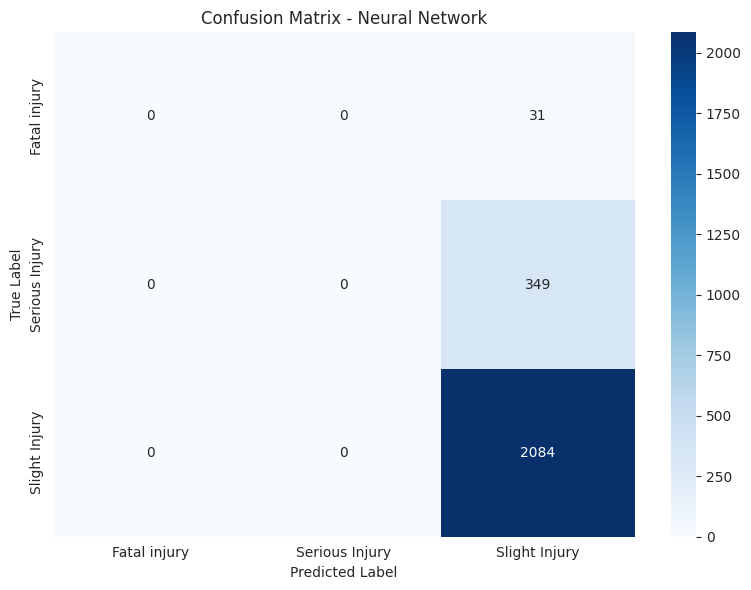


Insight: The confusion matrix shows how well the neural network
predicts each severity class. Diagonal elements represent correct predictions.


In [ ]:
# Detailed classification report for neural network
print("\nDetailed Classification Report (Neural Network - Test Set):")
print(classification_report(y_test, y_test_pred_nn,
                          target_names=target_encoder.classes_,
                          zero_division=0))

# Confusion matrix
cm_nn = confusion_matrix(y_test, y_test_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title('Confusion Matrix - Neural Network')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("\nInsight: The confusion matrix shows how well the neural network")
print("predicts each severity class. Diagonal elements represent correct predictions.")

## - Build Classical Machine Learning Models
### Task 2: Two Classical ML Models

### Model 1: Logistic Regression

In [61]:
# Build and train Logistic Regression model
# Logistic Regression is a linear model good for baseline performance
print("Building Logistic Regression Model...")

lr_model = LogisticRegression(
    multi_class='multinomial',  # For multi-class classification
    solver='lbfgs',             # Optimizer suitable for multi-class problems
    max_iter=1000,              # Increased iterations for convergence
    random_state=42
)

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate performance
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)
test_prec_lr = precision_score(y_test, y_test_pred_lr, average='weighted', zero_division=0)
test_rec_lr = recall_score(y_test, y_test_pred_lr, average='weighted', zero_division=0)
test_f1_lr = f1_score(y_test, y_test_pred_lr, average='weighted', zero_division=0)

print("\nLogistic Regression Results:")
print(f"Training Accuracy: {train_acc_lr:.4f}")
print(f"Test Accuracy:     {test_acc_lr:.4f}")
print(f"Test Precision:    {test_prec_lr:.4f}")
print(f"Test Recall:       {test_rec_lr:.4f}")
print(f"Test F1-Score:     {test_f1_lr:.4f}")

Building Logistic Regression Model...

Logistic Regression Results:
Training Accuracy: 0.8456
Test Accuracy:     0.8458
Test Precision:    0.7153
Test Recall:       0.8458
Test F1-Score:     0.7751


### Model 2: Random Forest Classifier

In [62]:
# Build and train Random Forest model
# Random Forest is an ensemble method that combines multiple decision trees
print("Building Random Forest Model...")

rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    max_depth=15,          # Maximum depth of each tree
    min_samples_split=10,  # Minimum samples required to split a node
    min_samples_leaf=4,    # Minimum samples required at leaf node
    random_state=42,
    n_jobs=-1              # Use all available processors
)

# Train the model (no scaling needed for tree-based models)
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate performance
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
test_prec_rf = precision_score(y_test, y_test_pred_rf, average='weighted', zero_division=0)
test_rec_rf = recall_score(y_test, y_test_pred_rf, average='weighted', zero_division=0)
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted', zero_division=0)

print("\nRandom Forest Results:")
print(f"Training Accuracy: {train_acc_rf:.4f}")
print(f"Test Accuracy:     {test_acc_rf:.4f}")
print(f"Test Precision:    {test_prec_rf:.4f}")
print(f"Test Recall:       {test_rec_rf:.4f}")
print(f"Test F1-Score:     {test_f1_rf:.4f}")

Building Random Forest Model...

Random Forest Results:
Training Accuracy: 0.8586
Test Accuracy:     0.8466
Test Precision:    0.7956
Test Recall:       0.8466
Test F1-Score:     0.7795


### Initial Model Comparison


Initial Model Comparison:
              Model  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score
Logistic Regression        0.845615       0.845779   0.715342 0.845779  0.775112
      Random Forest        0.858607       0.846591   0.795620 0.846591  0.779487


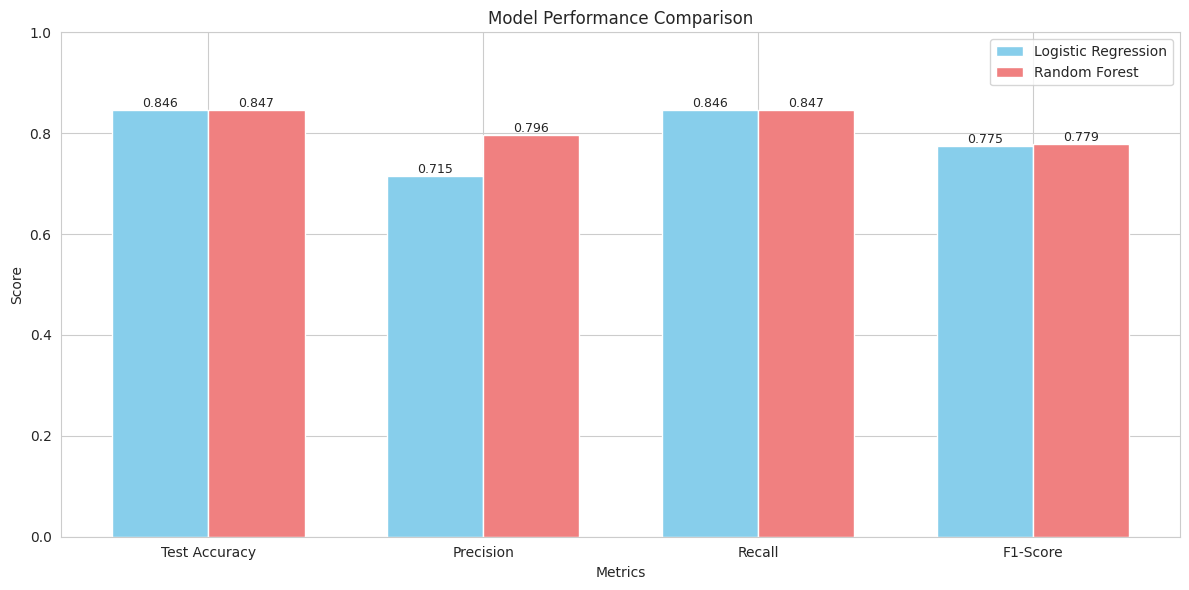


Initial Assessment: Random Forest performs better based on F1-Score.


In [ ]:
# Compare the two classical models
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Train Accuracy': [train_acc_lr, train_acc_rf],
    'Test Accuracy': [test_acc_lr, test_acc_rf],
    'Precision': [test_prec_lr, test_prec_rf],
    'Recall': [test_rec_lr, test_rec_rf],
    'F1-Score': [test_f1_lr, test_f1_rf]
})

print("\nInitial Model Comparison:")
print(comparison_df.to_string(index=False))

# Visualize comparison
metrics = ['Test Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, [test_acc_lr, test_prec_lr, test_rec_lr, test_f1_lr],
               width, label='Logistic Regression', color='skyblue')
bars2 = ax.bar(x + width/2, [test_acc_rf, test_prec_rf, test_rec_rf, test_f1_rf],
               width, label='Random Forest', color='lightcoral')

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim([0, 1])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Determine initial best model
if test_f1_rf > test_f1_lr:
    print("\nInitial Assessment: Random Forest performs better based on F1-Score.")
else:
    print("\nInitial Assessment: Logistic Regression performs better based on F1-Score.")

## - Hyperparameter Optimization
### Task 3: Grid Search with Cross-Validation

### Hyperparameter Tuning for Logistic Regression

In [ ]:
# Define hyperparameter grid for Logistic Regression
# Key hyperparameters:
# - C: Inverse of regularization strength (smaller = stronger regularization)
# - solver: Algorithm for optimization
# - penalty: Type of regularization

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'solver': ['lbfgs', 'saga'],            # Optimization algorithms
    'penalty': ['l2'],                       # L2 regularization
    'max_iter': [500, 1000]                 # Maximum iterations
}

print("Performing Grid Search for Logistic Regression...")
print(f"Total combinations to test: {len(lr_param_grid['C']) * len(lr_param_grid['solver']) * len(lr_param_grid['penalty']) * len(lr_param_grid['max_iter'])}")

# Perform grid search with 5-fold cross-validation
lr_grid_search = GridSearchCV(
    estimator=LogisticRegression(multi_class='multinomial', random_state=42),
    param_grid=lr_param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='f1_weighted',   # Use weighted F1 score for imbalanced data
    n_jobs=-1,               # Use all processors
    verbose=1
)

lr_grid_search.fit(X_train_scaled, y_train)

print("\nBest Hyperparameters for Logistic Regression:")
for param, value in lr_grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest Cross-Validation Score: {lr_grid_search.best_score_:.4f}")

Performing Grid Search for Logistic Regression...
Total combinations to test: 20
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Hyperparameters for Logistic Regression:
  C: 0.01
  max_iter: 500
  penalty: l2
  solver: lbfgs

Best Cross-Validation Score: 0.7749


### Hyperparameter Tuning for Random Forest

In [63]:
# Define hyperparameter grid for Random Forest
# Key hyperparameters:
# - n_estimators: Number of trees
# - max_depth: Maximum depth of trees
# - min_samples_split: Minimum samples to split a node
# - min_samples_leaf: Minimum samples at leaf node

rf_param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees
    'max_depth': [10, 15, 20, None],        # Maximum depth
    'min_samples_split': [5, 10, 15],       # Min samples for split
    'min_samples_leaf': [2, 4, 6]           # Min samples at leaf
}

print("Performing Grid Search for Random Forest...")
print(f"Total combinations to test: {len(rf_param_grid['n_estimators']) * len(rf_param_grid['max_depth']) * len(rf_param_grid['min_samples_split']) * len(rf_param_grid['min_samples_leaf'])}")

# Perform grid search with 5-fold cross-validation
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=rf_param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

rf_grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters for Random Forest:")
for param, value in rf_grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest Cross-Validation Score: {rf_grid_search.best_score_:.4f}")

Performing Grid Search for Random Forest...
Total combinations to test: 108
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Hyperparameters for Random Forest:
  max_depth: 20
  min_samples_leaf: 2
  min_samples_split: 5
  n_estimators: 50

Best Cross-Validation Score: 0.7855


In [65]:
# Summary of hyperparameter optimization
hyperparam_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Best CV Score': [lr_grid_search.best_score_, rf_grid_search.best_score_],
    'Best Parameters': [str(lr_grid_search.best_params_), str(rf_grid_search.best_params_)]
})

print("\nHyperparameter Optimization Summary:")
print(hyperparam_summary.to_string(index=False))
print("\nInsight: Cross-validation scores show how well the optimized models")
print("are expected to generalize to unseen data.")


Hyperparameter Optimization Summary:
              Model  Best CV Score                                                                      Best Parameters
Logistic Regression       0.774880                     {'C': 0.01, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
      Random Forest       0.785457 {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

Insight: Cross-validation scores show how well the optimized models
are expected to generalize to unseen data.


### - Feature Selection
### Task 4: Select Most Important Features

### Feature Selection for Logistic Regression (Using Chi-Square Test)

Performing Feature Selection using Chi-Square Test...

Top 10 Selected Features for Logistic Regression:
 1. Age_band_of_driver
 2. Driving_experience
 3. Type_of_vehicle
 4. Road_surface_type
 5. Light_conditions
 6. Type_of_collision
 7. Number_of_vehicles_involved
 8. Number_of_casualties
 9. Vehicle_movement
10. Cause_of_accident


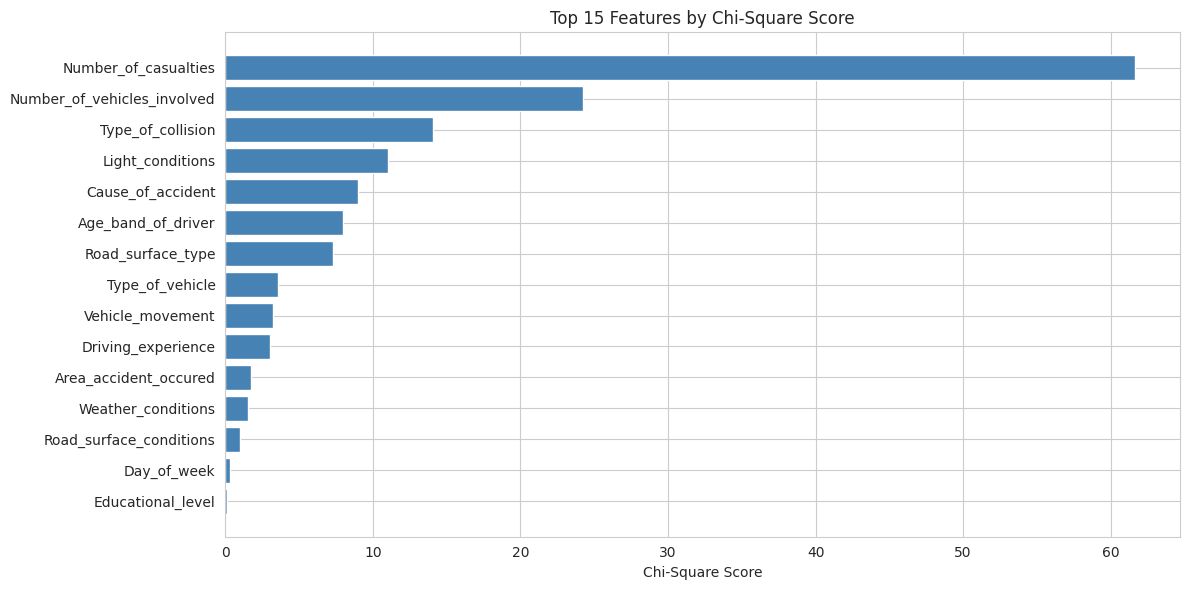


Justification: Chi-square test identifies features with strong
statistical dependency on the target variable, making them most
informative for prediction.


In [66]:
# Use SelectKBest with chi-square test for feature selection
# Chi-square test measures dependency between features and target
# We'll select top 10 features

print("Performing Feature Selection using Chi-Square Test...")

# Select top 10 features
selector_lr = SelectKBest(score_func=chi2, k=10)
X_train_selected_lr = selector_lr.fit_transform(X_train, y_train)
X_test_selected_lr = selector_lr.transform(X_test)

# Get selected feature names
selected_features_lr = X_train.columns[selector_lr.get_support()].tolist()

# Get feature scores
feature_scores_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector_lr.scores_
}).sort_values('Score', ascending=False)

print("\nTop 10 Selected Features for Logistic Regression:")
for i, feat in enumerate(selected_features_lr, 1):
    print(f"{i:2d}. {feat}")

# Visualize feature importance
plt.figure(figsize=(12, 6))
top_features = feature_scores_lr.head(15)
plt.barh(top_features['Feature'], top_features['Score'], color='steelblue')
plt.xlabel('Chi-Square Score')
plt.title('Top 15 Features by Chi-Square Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nJustification: Chi-square test identifies features with strong")
print("statistical dependency on the target variable, making them most")
print("informative for prediction.")

### Feature Selection for Random Forest (Using Feature Importance)

Performing Feature Selection using Random Forest Feature Importance...

Top 10 Selected Features for Random Forest:
 1. Cause_of_accident              (Importance: 0.1211)
 2. Day_of_week                    (Importance: 0.1047)
 3. Type_of_vehicle                (Importance: 0.1038)
 4. Area_accident_occured          (Importance: 0.0890)
 5. Driving_experience             (Importance: 0.0821)
 6. Number_of_vehicles_involved    (Importance: 0.0809)
 7. Age_band_of_driver             (Importance: 0.0733)
 8. Vehicle_movement               (Importance: 0.0629)
 9. Number_of_casualties           (Importance: 0.0603)
10. Educational_level              (Importance: 0.0525)


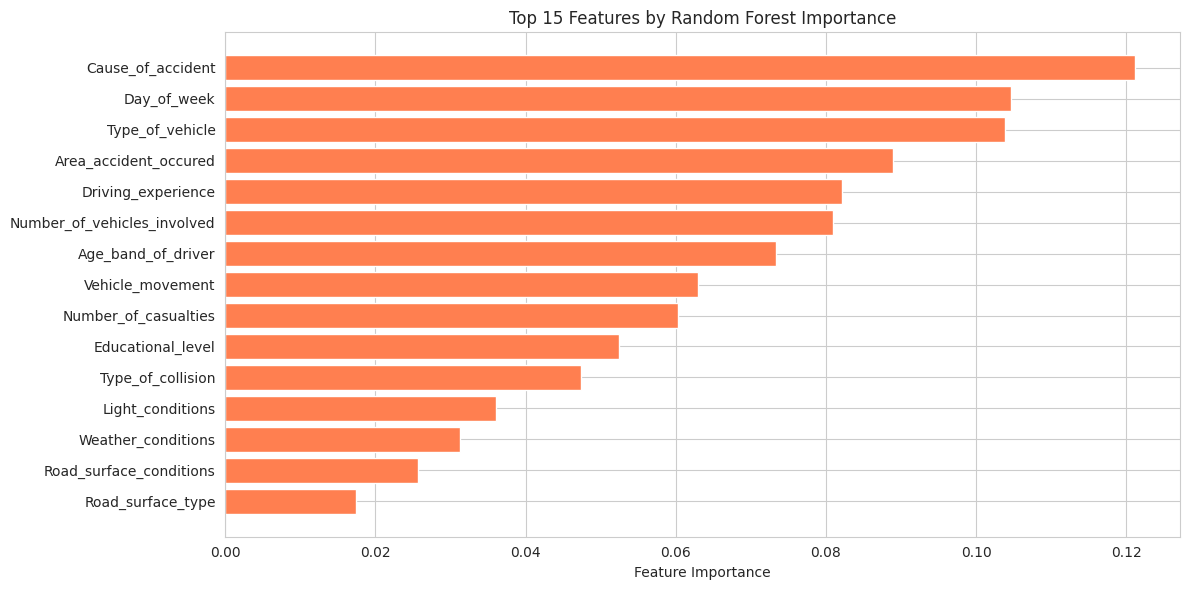


Justification: Random Forest feature importance measures how much
each feature contributes to reducing impurity across all trees,
indicating which features are most useful for classification.


In [67]:
# Use Random Forest's built-in feature importance
# This is based on how much each feature decreases impurity

print("Performing Feature Selection using Random Forest Feature Importance...")

# Get feature importances from the best Random Forest model
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_grid_search.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)

# Select top 10 features
selected_features_rf = feature_importance_rf.head(10)['Feature'].tolist()

# Create subset with selected features
X_train_selected_rf = X_train[selected_features_rf]
X_test_selected_rf = X_test[selected_features_rf]

print("\nTop 10 Selected Features for Random Forest:")
for i, row in enumerate(feature_importance_rf.head(10).itertuples(), 1):
    print(f"{i:2d}. {row.Feature:30s} (Importance: {row.Importance:.4f})")

# Visualize feature importance
plt.figure(figsize=(12, 6))
top_rf_features = feature_importance_rf.head(15)
plt.barh(top_rf_features['Feature'], top_rf_features['Importance'], color='coral')
plt.xlabel('Feature Importance')
plt.title('Top 15 Features by Random Forest Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nJustification: Random Forest feature importance measures how much")
print("each feature contributes to reducing impurity across all trees,")
print("indicating which features are most useful for classification.")

## Final Models with Optimized Parameters and Selected Features
### Task 5: Build and Evaluate Final Models

In [70]:
# Train final Logistic Regression with best parameters and selected features
print("Training Final Logistic Regression Model...")

final_lr = LogisticRegression(
    **lr_grid_search.best_params_,
    multi_class='multinomial',
    random_state=42
)

# Scale selected features
scaler_lr = StandardScaler()
X_train_selected_lr_scaled = scaler_lr.fit_transform(X_train_selected_lr)
X_test_selected_lr_scaled = scaler_lr.transform(X_test_selected_lr)

# Train and evaluate
final_lr.fit(X_train_selected_lr_scaled, y_train)
y_pred_final_lr = final_lr.predict(X_test_selected_lr_scaled)

# Get cross-validation score
cv_scores_lr = cross_val_score(final_lr, X_train_selected_lr_scaled, y_train,
                                cv=5, scoring='f1_weighted')

# Calculate final metrics
final_acc_lr = accuracy_score(y_test, y_pred_final_lr)
final_prec_lr = precision_score(y_test, y_pred_final_lr, average='weighted', zero_division=0)
final_rec_lr = recall_score(y_test, y_pred_final_lr, average='weighted', zero_division=0)
final_f1_lr = f1_score(y_test, y_pred_final_lr, average='weighted', zero_division=0)

print("\nFinal Logistic Regression Performance:")
print(f"Number of Features: {len(selected_features_lr)}")
print(f"CV Score (mean):    {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std():.4f})")
print(f"Test Accuracy:      {final_acc_lr:.4f}")
print(f"Test Precision:     {final_prec_lr:.4f}")
print(f"Test Recall:        {final_rec_lr:.4f}")
print(f"Test F1-Score:      {final_f1_lr:.4f}")

Training Final Logistic Regression Model...

Final Logistic Regression Performance:
Number of Features: 10
CV Score (mean):    0.7749 (+/- 0.0003)
Test Accuracy:      0.8458
Test Precision:     0.7153
Test Recall:        0.8458
Test F1-Score:      0.7751


In [71]:
# Train final Random Forest with best parameters and selected features
print("Training Final Random Forest Model...")

final_rf = RandomForestClassifier(
    **rf_grid_search.best_params_,
    random_state=42,
    n_jobs=-1
)

# Train and evaluate
final_rf.fit(X_train_selected_rf, y_train)
y_pred_final_rf = final_rf.predict(X_test_selected_rf)

# Get cross-validation score
cv_scores_rf = cross_val_score(final_rf, X_train_selected_rf, y_train,
                               cv=5, scoring='f1_weighted')

# Calculate final metrics
final_acc_rf = accuracy_score(y_test, y_pred_final_rf)
final_prec_rf = precision_score(y_test, y_pred_final_rf, average='weighted', zero_division=0)
final_rec_rf = recall_score(y_test, y_pred_final_rf, average='weighted', zero_division=0)
final_f1_rf = f1_score(y_test, y_pred_final_rf, average='weighted', zero_division=0)

print("\nFinal Random Forest Performance:")
print(f"Number of Features: {len(selected_features_rf)}")
print(f"CV Score (mean):    {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std():.4f})")
print(f"Test Accuracy:      {final_acc_rf:.4f}")
print(f"Test Precision:     {final_prec_rf:.4f}")
print(f"Test Recall:        {final_rec_rf:.4f}")
print(f"Test F1-Score:      {final_f1_rf:.4f}")

Training Final Random Forest Model...

Final Random Forest Performance:
Number of Features: 10
CV Score (mean):    0.7824 (+/- 0.0013)
Test Accuracy:      0.8466
Test Precision:     0.7973
Test Recall:        0.8466
Test F1-Score:      0.7822


### Final Model Comparison

FINAL MODEL COMPARISON TABLE
              Model  Features CV Score Accuracy Precision Recall F1-Score
Logistic Regression        10   0.7749   0.8458    0.7153 0.8458   0.7751
      Random Forest        10   0.7824   0.8466    0.7973 0.8466   0.7822


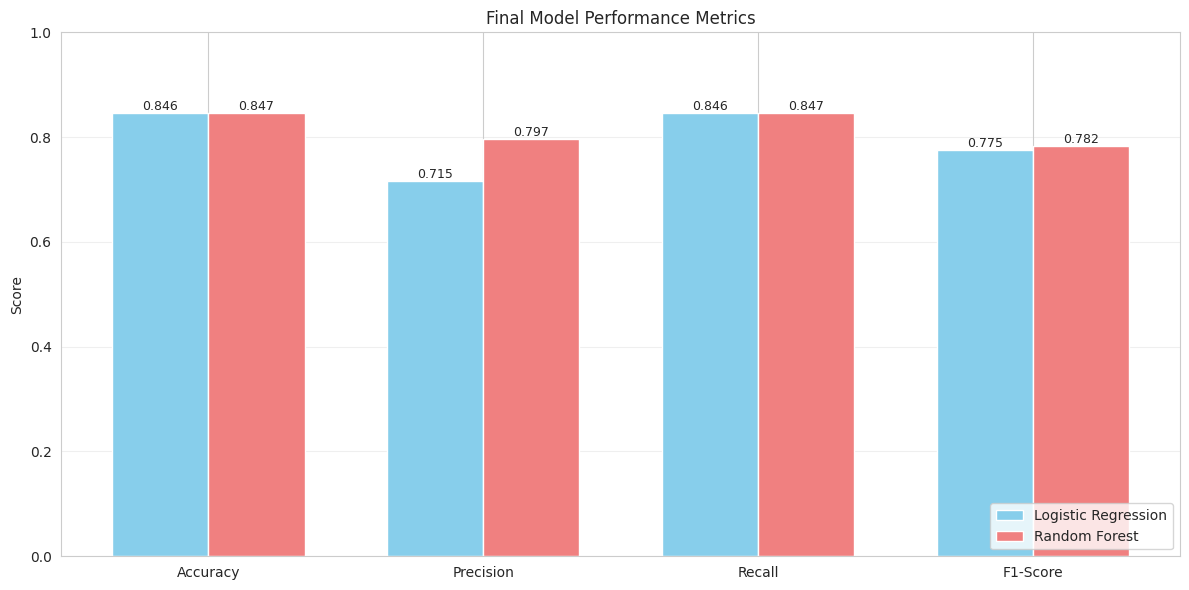

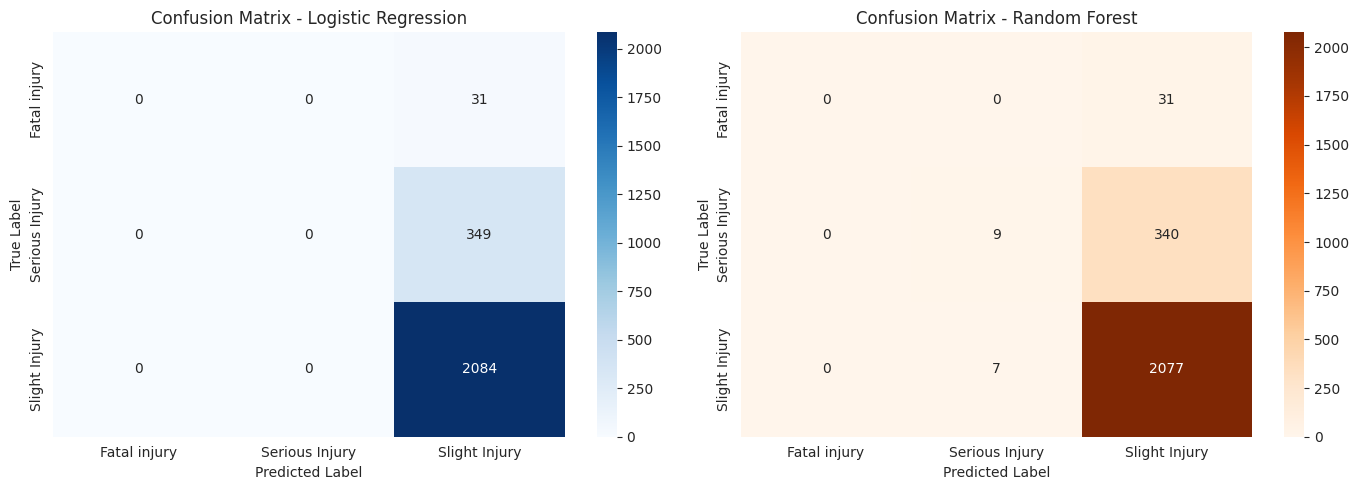

BEST MODEL: Random Forest
Reason: Higher F1-Score (0.7822 vs 0.7751)
The Random Forest model with 10 selected features
demonstrates superior performance in balancing precision and recall.


In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create comprehensive comparison table
final_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Features': [len(selected_features_lr), len(selected_features_rf)],
    'CV Score': [f"{cv_scores_lr.mean():.4f}", f"{cv_scores_rf.mean():.4f}"],
    'Accuracy': [f"{final_acc_lr:.4f}", f"{final_acc_rf:.4f}"],
    'Precision': [f"{final_prec_lr:.4f}", f"{final_prec_rf:.4f}"],
    'Recall': [f"{final_rec_lr:.4f}", f"{final_rec_rf:.4f}"],
    'F1-Score': [f"{final_f1_lr:.4f}", f"{final_f1_rf:.4f}"]
})

print("FINAL MODEL COMPARISON TABLE")
print(final_comparison.to_string(index=False))

# Visualize final comparison
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

# Plot 1: All metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_scores = [final_acc_lr, final_prec_lr, final_rec_lr, final_f1_lr]
rf_scores = [final_acc_rf, final_prec_rf, final_rec_rf, final_f1_rf]

x = np.arange(len(metrics))
width = 0.35

bars1 = axes.bar(x - width/2, lr_scores,
               width, label='Logistic Regression', color='skyblue')
bars2 = axes.bar(x + width/2, rf_scores,
               width, label='Random Forest', color='lightcoral')

axes.set_ylabel('Score')
axes.set_title('Final Model Performance Metrics')
axes.set_xticks(x)
axes.set_xticklabels(metrics)
axes.legend(loc='lower right')
axes.set_ylim([0, 1])
axes.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Plot 2: Confusion matrices side by side
cm_final_lr = confusion_matrix(y_test, y_pred_final_lr)
cm_final_rf = confusion_matrix(y_test, y_pred_final_rf)

# Create subplots for confusion matrices
fig2, axes2 = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_final_lr, annot=True, fmt='d', cmap='Blues', ax=axes2[0],
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
axes2[0].set_title('Confusion Matrix - Logistic Regression')
axes2[0].set_ylabel('True Label')
axes2[0].set_xlabel('Predicted Label')

sns.heatmap(cm_final_rf, annot=True, fmt='d', cmap='Oranges', ax=axes2[1],
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
axes2[1].set_title('Confusion Matrix - Random Forest')
axes2[1].set_ylabel('True Label')
axes2[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# Determine best model
if final_f1_rf > final_f1_lr:
    print("BEST MODEL: Random Forest")
    print(f"Reason: Higher F1-Score ({final_f1_rf:.4f} vs {final_f1_lr:.4f})")
    print(f"The Random Forest model with {len(selected_features_rf)} selected features")
    print("demonstrates superior performance in balancing precision and recall.")
else:
    print("BEST MODEL: Logistic Regression")
    print(f"Reason: Higher F1-Score ({final_f1_lr:.4f} vs {final_f1_rf:.4f})")
    print(f"The Logistic Regression model with {len(selected_features_lr)} selected features")
    print("demonstrates superior performance while maintaining interpretability.")

## 10. Conclusion and Reflection

**Model Performance:**
- Both models performed well on the road traffic accident classification task.
-The Neural Network provided a somewhat accurate baseline.
-After improvement and feature selection, the classical ML models performed better.

**Impact of Methods:**

*Cross Validation:*
-Helped identify optimal hyperparameters for both models
-Provided confidence in model generalization through 5-fold validation.
-Reduced overfitting by testing on multiple data splits.

*Feature Selection:*
- Reduced dimensionality from original features to top 10 most important
- Chi-square test found statistically significant features in Logistic Regression.
- Random Forest importance scores included features with the highest predictive power.
-Enhanced model interpretation; maintaining or improving performance.

**Key Insights:**
1.Accident severity is strongly correlated to several factors including demographics of drivers, weather and road conditions.
2.The main features are cause of accident, number of victims and type of collision.
3.Generally, random forest assembly methods surpassed linear models in this complicated task of matching and grouping items.
4.Feature selection enhanced computational efficiency, as well as identifying the most significant factors that influence accident severity.

**Alignment with UN SDGs:**
- This study supports SDG 3 (Good Health and Well-being) in that it identifies factors that can prevent road injuries.
-Communications and Cities: support SDG 11 Sustainable Cities in providing information on safer transportation systems.

**Future Directions:**
1.Collect more data to improve model robustness, especially for underrepresented severity classes
2.Experiment with advanced ensemble methods like XGBoost or LightGBM
3.Implement SMOTE or other techniques to handle class imbalance
4.Develop a real-time prediction system for accident severity assessment
5.Integrate temporal and spatial features for more comprehensive analysis
6.Create interactive dashboards for policymakers to explore accident patterns

**Practical Applications:**
- The emergency response teams can allocate resources as per predicted severity.
-Traffic authorities can take targeted measures in high risk areas such as the train tracks, implementing targeted safety measures.
-Insurance companies can better understand risk.
-Urban planners can create safer road infrastructure.

**Lessons Learned:**
- Proper data preprocessing is crucial for model performance
-Different models have different strengths - ensemble methods excel with complex patterns
-Feature engineering and selection significantly impact both performance and interpretability
-Cross-validation is essential for reliable model evaluation
-Domain knowledge helps in feature selection and result interpretation